# Research

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt

In [2]:
df_quotes = pd.read_csv("ft_quotes.csv",index_col=0,parse_dates=True).sort_index(ascending=True).ffill().dropna(axis=1)
df_quotes.index = [x.date() for x in df_quotes.index]
df_perform = pd.read_csv("ft_funds_perform.csv", index_col=0)
df_cat_perform = pd.read_csv("ft_cat_perform.csv", index_col=0)

max_date = df_quotes.index.max()
w1_ago = max_date-timedelta(days=7)
w1_ago = df_quotes[df_quotes.index <= w1_ago].index.max()
d1_ago = max_date-timedelta(days=1)
d1_ago = df_quotes[df_quotes.index <=d1_ago].index.max()
w2_ago = max_date-timedelta(days=14)
w2_ago = df_quotes[df_quotes.index <= w2_ago].index.max()

df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[d1_ago]-1).rename('1 day'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w1_ago]-1).rename('1 week'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w2_ago]-1).rename('2 week'))

df_perform = df_perform[df_perform['currency'].isin(['EUR','USD'])]

### Short term

In [3]:
df_perform[df_perform['rating']>=3].sort_values(by="1 day").dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0164852419,-0.0293,-0.1768,-0.1707,-0.0787,-0.0686,-0.0578,China Equity,HSBC Global Investment Funds - Chinese Equity EC,USD,3,6,-0.034906,-0.044678,-0.032184
LU0522352607,0.0043,-0.2212,-0.2652,-0.1510,-0.1019,-0.0745,China Equity,JPMorgan Funds - China Fund D (acc) - EUR,EUR,3,7,-0.034862,-0.044278,-0.049006
LU0348827899,-0.0391,-0.1875,-0.2629,-0.1375,-0.1453,-0.1123,China Equity,Allianz Global Investors Fund - Allianz China ...,EUR,3,7,-0.032033,-0.042568,-0.043951
LU0572944774,-0.0484,-0.1913,-0.2338,-0.1055,-0.1185,-0.0940,China Equity,Janus Henderson Horizon China Opportunities Fu...,EUR,3,6,-0.031822,-0.039463,-0.036421
LU0717749021,-0.0411,-0.1669,-0.1870,-0.0685,-0.0682,-0.0635,China Equity,Invesco Funds- Invesco China Focus Equity Fund...,EUR,3,6,-0.031596,-0.033123,-0.025437
LU0117867159,0.0047,-0.2211,-0.2642,-0.1486,-0.1002,-0.0759,China Equity,JPMorgan Funds - China Fund D (acc) - USD,USD,3,7,-0.031016,-0.034261,-0.024206
LU1882445643,-0.0402,-0.1982,-0.2221,-0.1126,-0.0924,-0.0754,China Equity,Amundi Funds - China Equity A USD (C),USD,3,6,-0.030756,-0.037159,-0.020168
LU0164857640,-0.0480,-0.1504,-0.1881,-0.1051,-0.0810,-0.0587,Hong Kong Equity,HSBC Global Investment Funds - Hong Kong Equit...,USD,3,6,-0.029697,-0.037080,-0.015266
LU0594300096,-0.0361,-0.1890,-0.1929,-0.0911,-0.0635,-0.0622,China Equity,Fidelity Funds - China Consumer Fund A-Acc-EUR,EUR,3,6,-0.028520,-0.045534,-0.035398
LU0982190216,-0.0174,-0.1611,-0.2626,-0.1207,-0.1166,-0.1015,China Equity,GAM Multistock - China Evolution Equity USD E,USD,3,6,-0.028003,-0.040804,-0.028078


In [4]:
df_perform[df_perform['rating']>=3].sort_values(by="1 day", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU1897414303,0.1953,0.0346,0.1337,0.0424,0.0770,0.1374,Sector Equity Biotechnology,Janus Henderson Horizon Biotechnology A2 USD Acc,USD,5,6,0.026925,0.003693,0.058423
LU0090841262,0.0664,-0.0620,0.0200,0.0391,0.0488,0.0586,Sector Equity Precious Metals,BlackRock Global Funds - World Gold Fund E2,USD,3,7,0.025507,0.044289,0.074341
LU0273148055,0.0877,-0.0476,-0.0185,0.0311,0.0609,0.0832,Sector Equity Precious Metals,DWS Invest Gold and Precious Metals Equities NC,EUR,4,7,0.019320,0.033330,0.062912
LU1548497426,0.1794,-0.0343,0.3516,0.0984,0.1259,0.0794,Sector Equity Technology,Allianz Global Investors Fund - Allianz Global...,USD,3,7,0.019121,0.013760,0.074646
LU1854103824,0.0875,0.0019,-0.0172,0.0010,0.0213,0.0651,Global Flex-Cap Equity,M&G (Lux) Positive Impact Fund A USD Inc,USD,3,6,0.016229,0.019380,0.061340
LU1854104046,0.0874,0.0019,-0.0172,0.0010,0.0213,0.0651,Global Flex-Cap Equity,M&G (Lux) Positive Impact Fund A USD Acc,USD,3,6,0.016141,0.018382,0.061303
LU0566484027,0.1052,0.0329,0.0338,0.0313,0.0532,0.0915,US Small-Cap Equity,Aberdeen Standard SICAV I - North American Sma...,USD,3,6,0.014474,0.005061,0.071975
LU0432979960,0.0811,0.0139,-0.0543,-0.0043,-0.0070,0.0366,Sector Equity Healthcare,JPMorgan Funds - Global Healthcare Fund D (acc...,USD,4,6,0.013894,0.015646,0.043626
LU0348723411,0.1822,0.0451,0.2976,0.0998,0.1116,0.0399,Sector Equity Technology,Allianz Global Investors Fund - Allianz Global...,USD,3,7,0.013840,0.007596,0.032177
LU1670715629,0.1014,0.1283,0.0766,-0.0119,-0.0225,0.0223,Japan Small/Mid-Cap Equity,M&G (Lux) Japan Smaller Companies Fund A USD Acc,USD,4,6,0.013528,0.002140,0.025739


In [5]:
df_perform.sort_values(by="1 week", ascending=False).dropna()

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0090841262,0.0664,-0.0620,0.0200,0.0391,0.0488,0.0586,Sector Equity Precious Metals,BlackRock Global Funds - World Gold Fund E2,USD,3,7,0.025507,0.044289,0.074341
LU0326423224,0.0263,-0.1226,0.0172,0.0238,0.0689,0.0580,Other Equity,BlackRock Global Funds - World Gold Fund E2 EU...,EUR,0,7,0.025882,0.043062,0.071253
LU0345781412,0.1605,0.2046,0.0067,0.0902,0.0287,0.0482,Sector Equity Natural Resources,Ninety One Global Strategy Fund - Global Natur...,USD,5,7,0.004057,0.039916,0.081573
LU0345780950,0.1608,0.2051,0.0074,0.0904,0.0283,0.0486,Sector Equity Natural Resources,Ninety One Global Strategy Fund - Global Natur...,USD,5,7,0.003802,0.039370,0.081229
LU0273148055,0.0877,-0.0476,-0.0185,0.0311,0.0609,0.0832,Sector Equity Precious Metals,DWS Invest Gold and Precious Metals Equities NC,EUR,4,7,0.019320,0.033330,0.062912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU0522352607,0.0043,-0.2212,-0.2652,-0.1510,-0.1019,-0.0745,China Equity,JPMorgan Funds - China Fund D (acc) - EUR,EUR,3,7,-0.034862,-0.044278,-0.049006
LU0164852419,-0.0293,-0.1768,-0.1707,-0.0787,-0.0686,-0.0578,China Equity,HSBC Global Investment Funds - Chinese Equity EC,USD,3,6,-0.034906,-0.044678,-0.032184
LU0594300096,-0.0361,-0.1890,-0.1929,-0.0911,-0.0635,-0.0622,China Equity,Fidelity Funds - China Consumer Fund A-Acc-EUR,EUR,3,6,-0.028520,-0.045534,-0.035398
LU0975277921,-0.0477,-0.2229,-0.2550,-0.1695,-0.1430,-0.1183,China Equity,Nordea 1 - Chinese Equity Fund E EUR,EUR,0,6,-0.033477,-0.049109,-0.041186


In [6]:

df_perform[df_perform['rating']>=3].sort_values(by="1 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0090841262,0.0664,-0.0620,0.0200,0.0391,0.0488,0.0586,Sector Equity Precious Metals,BlackRock Global Funds - World Gold Fund E2,USD,3,7,0.025507,0.044289,0.074341
LU0345781412,0.1605,0.2046,0.0067,0.0902,0.0287,0.0482,Sector Equity Natural Resources,Ninety One Global Strategy Fund - Global Natur...,USD,5,7,0.004057,0.039916,0.081573
LU0345780950,0.1608,0.2051,0.0074,0.0904,0.0283,0.0486,Sector Equity Natural Resources,Ninety One Global Strategy Fund - Global Natur...,USD,5,7,0.003802,0.039370,0.081229
LU0273148055,0.0877,-0.0476,-0.0185,0.0311,0.0609,0.0832,Sector Equity Precious Metals,DWS Invest Gold and Precious Metals Equities NC,EUR,4,7,0.019320,0.033330,0.062912
LU0090845842,0.1285,0.0677,-0.0669,-0.0011,0.0239,0.0418,Sector Equity Natural Resources,BlackRock Global Funds - World Mining Fund E2,USD,3,7,0.012261,0.032745,0.073628
LU0496369116,0.0939,-0.0825,-0.0393,0.0101,0.0442,0.0930,Sector Equity Precious Metals,Franklin Gold & Precious Metals Fund N(acc)USD,USD,3,7,0.003899,0.032064,0.057495
LU0115765678,0.0457,0.0452,0.2476,0.1209,0.0819,0.0628,Spain Equity,Fidelity Funds - Iberia Fund E-Acc-EUR,EUR,4,6,0.001343,0.030800,0.027958
LU0266512630,0.1012,0.1415,-0.0453,0.0583,-0.0026,0.0202,Sector Equity Natural Resources,JPMorgan Funds - Global Natural Resources Fund...,USD,3,7,0.010830,0.029412,0.061947
LU0670731933,-0.0289,-0.0354,0.0324,-0.0583,0.0523,0.0486,Brazil Equity,Bradesco Global Funds Brazilian Equities Mid S...,USD,3,7,0.000000,0.029289,0.047747
LU0345780521,0.0908,-0.0394,0.0290,0.0523,0.0645,0.0853,Sector Equity Precious Metals,Ninety One Global Strategy Fund - Global Gold ...,USD,4,7,0.006392,0.028962,0.072280


In [7]:
df_perform[(df_perform['risk']<=3) & (df_perform['currency']=="EUR")].sort_values(by="2 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU0853555380,-0.0073,-0.0550,0.0349,0.0536,0.0634,0.0526,Global Flexible Bond - EUR Hedged,Jupiter Dynamic Bond Class L EUR Acc,EUR,2,3,0.000885,0.009821,0.036664
LU0459992896,-0.0073,-0.0550,0.0351,0.0533,0.0640,0.0528,Global Flexible Bond - EUR Hedged,Jupiter Dynamic Bond Class L EUR Q Inc,EUR,3,3,0.001208,0.009744,0.036250
LU1529954668,-0.0176,-0.0708,0.0354,0.0608,0.0728,0.0506,EUR Diversified Bond,Eurizon Fund - Bond Aggregate EUR Class R EUR Acc,EUR,2,3,0.000000,0.006339,0.030844
LU0367640660,-0.0098,-0.0597,0.0450,0.0557,0.0752,0.0525,EUR Government Bond,Epsilon Fund - Euro Bond Class Unit R EUR Accu...,EUR,4,3,0.000000,0.007499,0.030555
LU1340703070,-0.0091,-0.0577,0.0354,0.0478,0.0635,0.0451,Global Flexible Bond - EUR Hedged,MFS Meridian Funds - Global Opportunistic Bond...,EUR,3,3,0.001049,0.007392,0.030238
LU1340703153,-0.0081,-0.0567,0.0343,0.0458,0.0625,0.0440,Global Flexible Bond - EUR Hedged,MFS Meridian Funds - Global Opportunistic Bond...,EUR,3,3,0.001232,0.007435,0.029114
LU0145652649,-0.0267,-0.0811,0.0427,0.0597,0.0718,0.0465,EUR Government Bond,DWS Invest Euro-Gov Bonds NC,EUR,2,3,0.001342,0.008952,0.028423
LU0534240402,0.0103,-0.0236,0.0421,0.0587,0.0622,0.0407,Global Flexible Bond - EUR Hedged,Invesco Funds - Invesco Global Total Return (E...,EUR,4,3,0.000000,0.005622,0.028017
LU0546918151,-0.0252,-0.0738,0.0742,0.0768,0.0764,0.0480,EUR Diversified Bond,NN (L) Euro Fixed Income - X Cap EUR,EUR,2,3,0.000634,0.007345,0.028010
LU0251659420,-0.0165,-0.0703,0.0698,0.0722,0.0785,0.0502,EUR Diversified Bond,AXA World Funds - Euro 7-10 E Capitalisation EUR,EUR,3,3,-0.001660,0.004268,0.027989


### Category 

In [8]:
#df_cat_perform.drop(columns=["3 years","6 months"],inplace=True)
df_perform_group_by = df_perform.groupby(by="ft category")
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].mean().rename('1 day mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].median().rename('1 m mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].median().rename('1 day median'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].max().rename('1 m max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].count().rename('count'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].median().rename('1 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].max().rename('1 w max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].median().rename('2 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].max().rename('2 w max'))

In [9]:
df_cat_perform['1 m mean'].sort_values(ascending=False)[:20]

ft category
Sector Equity Biotechnology          0.13715
Property - Indirect Eurozone         0.12390
Property - Indirect North America    0.10550
Nordic Small/Mid-Cap Equity          0.10530
US Small-Cap Equity                  0.09920
Property - Indirect Europe           0.09820
Property - Indirect Other            0.08540
EUR Bond - Long Term                 0.08430
Sector Equity Precious Metals        0.08300
Australia & New Zealand Equity       0.08080
Property - Indirect Global           0.07870
Sector Equity Alternative Energy     0.07660
Global Small/Mid-Cap Equity          0.07480
US Flex-Cap Equity                   0.07390
Sector Equity Water                  0.07275
Europe ex-UK Small/Mid-Cap Equity    0.06825
Europe Small-Cap Equity              0.06710
SEK Diversified Bond                 0.06670
US Mid-Cap Equity                    0.06510
Europe Mid-Cap Equity                0.06490
Name: 1 m mean, dtype: float64

In [10]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="1 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Sector Equity Precious Metals,0.0872,-0.0570,-0.0047,0.0268,0.0447,0.0831,0.007681,0.08300,0.005979,0.0930,10.0,0.025094,0.044289,0.059811,0.074341
Norway Equity,0.0597,0.0560,0.0093,0.1016,0.0300,0.0501,0.006531,0.05830,0.006531,0.0583,1.0,0.021355,0.021355,0.062835,0.062835
SEK Diversified Bond,-0.0258,-0.0656,0.0412,0.1250,0.1368,0.0572,0.001836,0.06670,0.001836,0.0667,1.0,0.021048,0.021048,0.041508,0.041508
Brazil Equity,0.0242,0.0320,0.2262,0.0571,0.0938,0.0476,0.000575,0.04860,0.000000,0.0513,8.0,0.020804,0.029289,0.036636,0.050563
Australia & New Zealand Equity,0.1070,0.0548,0.0129,0.0359,0.0853,0.0754,-0.000140,0.08080,-0.000140,0.0808,1.0,0.020727,0.020727,0.052608,0.052608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Africa Equity,-0.0291,-0.0149,-0.0613,0.0179,0.0317,0.0103,-0.002914,0.02160,0.000000,0.0251,3.0,-0.021105,-0.014994,-0.007273,0.009456
Greater China Equity,0.0089,-0.1276,-0.1102,-0.0700,-0.0363,-0.0517,-0.016267,-0.06510,-0.015963,-0.0391,9.0,-0.028857,-0.016717,-0.009877,-0.006161
China Equity,-0.0227,-0.1715,-0.1936,-0.1134,-0.0855,-0.0734,-0.021270,-0.08300,-0.026600,-0.0469,33.0,-0.032574,-0.006270,-0.019067,0.013155


In [11]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="2 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Nordic Small/Mid-Cap Equity,0.1046,-0.0405,0.0297,0.0704,0.1374,0.1019,0.010947,0.10530,0.010947,0.1053,1.0,0.020442,0.020442,0.069485,0.069485
US Small-Cap Equity,0.1173,0.0461,0.1091,0.0783,0.0758,0.0941,0.006808,0.09920,0.007543,0.1188,23.0,0.013661,0.031113,0.069043,0.086582
Norway Equity,0.0597,0.0560,0.0093,0.1016,0.0300,0.0501,0.006531,0.05830,0.006531,0.0583,1.0,0.021355,0.021355,0.062835,0.062835
Sector Equity Biotechnology,0.0748,-0.0714,-0.0045,-0.0194,0.0385,0.0847,0.020723,0.13715,0.024896,0.1554,8.0,-0.000703,0.032139,0.061360,0.092097
Sector Equity Precious Metals,0.0872,-0.0570,-0.0047,0.0268,0.0447,0.0831,0.007681,0.08300,0.005979,0.0930,10.0,0.025094,0.044289,0.059811,0.074341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hong Kong Equity,-0.0365,-0.1019,-0.1585,-0.1073,-0.0776,-0.0673,-0.027774,-0.09035,-0.027774,-0.0587,2.0,-0.037308,-0.037080,-0.017432,-0.015266
China Equity,-0.0227,-0.1715,-0.1936,-0.1134,-0.0855,-0.0734,-0.021270,-0.08300,-0.026600,-0.0469,33.0,-0.032574,-0.006270,-0.019067,0.013155
China Equity - A Shares,0.0319,-0.1345,-0.1964,-0.1261,-0.0932,-0.0751,-0.001483,-0.07800,0.000000,-0.0565,5.0,-0.009441,-0.002938,-0.019470,-0.007602


In [12]:
trendy_cat = df_cat_perform.apply(lambda x: x['1 w mean'] + x['1 m mean']*(1 if (x['1 w mean']<0 and x['1 m mean']<0) else -1)  ,axis=1).sort_values(ascending=False)[:10]
trendy_cat

ft category
Commodities - Broad Basket       0.042854
Thailand Equity                  0.026816
Indonesia Equity                 0.017651
Multistrategy EUR                0.016299
ASEAN Equity                     0.012810
Sector Equity Energy             0.007451
Equity Market Neutral USD        0.007145
USD Money Market - Short Term    0.006074
Options Trading                  0.005977
USD Money Market                 0.005731
dtype: float64

In [13]:
trendy_funds = df_perform.apply(lambda x: x['1 week'] + x['1 month']*(1 if (x['1 week']<0 and x['1 month']<0) else -1)  ,axis=1).sort_values(ascending=False)
trendy_funds = trendy_funds.to_frame().rename(columns={0:'score'})
trendy_funds['name'] = trendy_funds.index.map(df_perform['name'])
trendy_funds[:20]


,score,name
LU1046234842,0.045348,Schroder International Selection Fund European...
LU0518135537,0.045210,NN (L) Commodity Enhanced - X Cap USD
LU0415414829,0.043554,Vontobel Fund - Commodity B USD
LU1873111105,0.042780,T. Rowe Price Funds SICAV - Japanese Equity Fu...
LU0607983201,0.042495,Nordea 1 - Alpha 15 MA Fund E EUR
LU0415415636,0.040133,Vontobel Fund - Commodity H (hedged) EUR
IE00B1D7YH97,0.038050,PIMCO GIS Commodity Real Return Fund E Class U...
IE00BFLQFP11,0.037690,BNY Mellon Global Funds PLC - BNY Mellon Japan...
LU0122377152,0.035268,BlackRock Global Funds - World Energy Fund E2
LU0236738190,0.034775,Schroder International Selection Fund Japanese...


[]

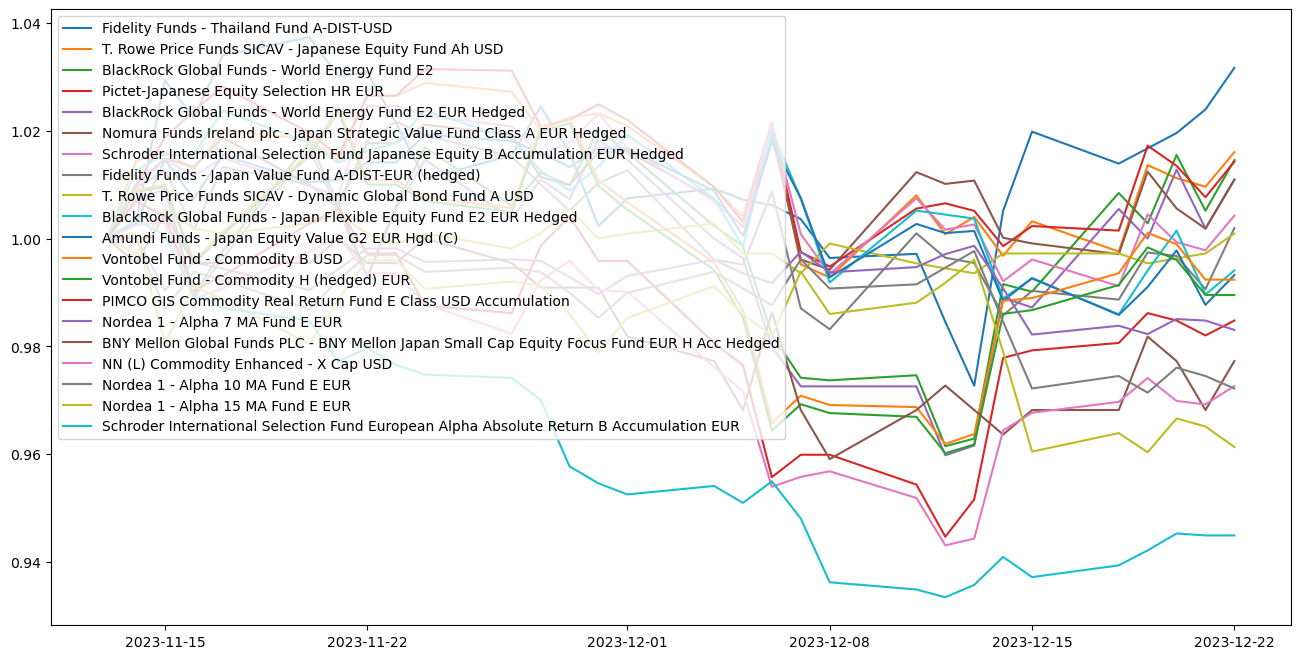

In [14]:

df = df_quotes[trendy_funds[:20].index][-30:]
ax = df.apply(lambda x: x/df.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df.index.max(), axis='columns', ascending=False).plot(figsize=(16,8))
ax.legend(loc='upper left')
ax.plot()

In [15]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import cvxpy
import numpy as np
cvxpy.installed_solvers()

['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']

### Portofolio Studies

In [16]:
#####  Get the current Portofolio
portfolio_csv = 'portofolio.csv'
df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code').drop('LU0122613903')

#Remove funds that were sold
sold_funds = set()
#sold_funds = {'LU0115098948','LU0055114457','LU0300742037'}

#Select only funds that are in the portfolio and have quotes
df_portofolio = df_portofolio[df_portofolio.index.isin(set(df_portofolio.index) & set(df_quotes.columns) - sold_funds)]

#Add the last price to the portolio 
df_portofolio['Last Price'] = df_quotes[df_portofolio.index].iloc[-1]

#get the last USD change rate
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
usd2eur = exchange_rates.set_index('Date').iloc[0].iloc[0]

#Add the amount in EUR to the portolio
df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * df_portofolio['Last Price'] * df_portofolio['Quantidade']

df_portofolio

,Nome,Moeda,Quantidade,Last Price,Amount EUR
Code,,,,,
FR0000989915,Oddo BHF Immobilier CR,EUR,8.3410,1613.99,13462.290590
IE00B23S7K36,BNY Mellon Brazil Equity,EUR,3835.9600,1.46,5600.501600
IE00BD4GTQ32,FTGF ClearBridge Infra Val,EUR,303.2290,14.66,4445.337140
IE00BDRKSX26,Man VI PLC GLC Innov Alt DN,USD,93.9320,132.08,11235.733516
IE00BLP5S460,Jupiter Glb Abs Rt EUR,EUR,10078.5520,1.49,15017.042480
LU0108459040,Candriam Biotech C Cap USD,USD,12.6500,790.21,9052.819211
LU0140363697,F Technology N,EUR,315.3770,29.76,9385.619520
LU0159053015,JPM US Technology D,EUR,156.4210,68.42,10702.324820
LU0173776047,Nordea 1 - Swedish Bond,EUR,532.9680,21.83,11634.691440


In [17]:
#####  Portofolio current weigths and performance

risk_free_rate = 0.035
last_n = 71
cov_n = 130
print("### Period = {} ".format(df_quotes.index[-last_n]))
mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
ef.set_weights(weights)
dfi = pd.DataFrame({'w':weights,'name':df_portofolio['Nome']}).reset_index().sort_values(by='w',ascending=False)
print(dfi)
print("### Curent Performance")
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)


### Period = 2023-09-18 
            Code         w                           name
20  LU1244139660  0.083392             TRP Glb Technology
4   IE00BLP5S460  0.062086         Jupiter Glb Abs Rt EUR
0   FR0000989915  0.055658         Oddo BHF Immobilier CR
16  LU0705071453  0.054905  RAM System Long/Short Europ B
19  LU1176912761  0.052770             JPM Eur Eqt Abs Al
21  LU1495982271  0.050863  Black Strat Asia Pacif Abs E2
25  LU1915690918  0.049121          Nordea Eu Cov Bond Op
8   LU0173776047  0.048102        Nordea 1 - Swedish Bond
3   IE00BDRKSX26  0.046453    Man VI PLC GLC Innov Alt DN
12  LU0286668966  0.044733  Fidelity Asian High Yield EUR
7   LU0159053015  0.044247            JPM US Technology D
22  LU1670718219  0.042465            M&S Short Corp Bond
6   LU0140363697  0.038804                 F Technology N
5   LU0108459040  0.037428     Candriam Biotech C Cap USD
11  LU0248183815  0.032354         Schroder Latam B Accum
10  LU0213962813  0.031669         HSBC Turkey 

(0.26586038753975094, 0.06560239438578881, 3.5190847788592503)

In [18]:
def new_fund_performance(new_portfolio, new_fund, amount=5000.0, risk_free_rate=risk_free_rate, last_n=last_n, goal='max_sharpe',target=None,weight_bounds = (0,1)):
    if new_fund in new_portfolio.index:
        new_portfolio.loc[new_fund,'Amount EUR'] += amount
    else:
        new_portfolio.loc[new_fund] = ["", df_perform.loc[new_fund]['currency'],1,amount,amount]

    mu = mean_historical_return(df_quotes[new_portfolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[new_portfolio.index][-cov_n:]).ledoit_wolf()
    ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
    if goal=='max_sharpe':
        ef.max_sharpe(risk_free_rate=risk_free_rate)
    elif goal=='min_volatility':
        ef.min_volatility()
    elif goal=='efficient_risk':
        ef.efficient_risk(target_volatility=target)
    elif goal=='efficient_return':
        ef.efficient_return(target_return=target)
    else:
        raise ValueError('Invalid Goal!')
    return new_portfolio, ef.portfolio_performance(risk_free_rate=risk_free_rate)

def new_funds_to_add(df_portofolio, selected_funds, n_funds_to_add, last_n, goal, target=None, verbose=False, weight_bounds = (0,1)):

    mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()

    ef = EfficientFrontier(mu, S, solver='SCS')
    weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
    ef.set_weights(weights)

    current_return, current_volatility, current_sharpe_ratio = ef.portfolio_performance(risk_free_rate=risk_free_rate)

    max_sharpe = current_sharpe_ratio
    min_volatility = current_volatility
    amount = 10000.0
    funds_to_buy = []
    performance = None

    current_portfolio = df_portofolio.copy()
    for i in range(n_funds_to_add):
        best_fund = None
        for new_fund in selected_funds:
            try:
                _, (new_return,new_volatility,new_sharpe) = new_fund_performance(
                                                    new_portfolio=current_portfolio.copy(),
                                                    new_fund=new_fund,
                                                    last_n=last_n,
                                                    goal=goal,
                                                    target=target)
                if ((goal == 'max_sharpe') or (goal == 'efficient_risk')) and (new_sharpe > max_sharpe):
                    max_sharpe = new_sharpe
                    best_fund = new_fund
                if ((goal == 'min_volatility') or (goal == 'efficient_return')) and (new_volatility < min_volatility):
                    min_volatility = new_volatility
                    best_fund = new_fund
            except Exception as e:
                raise e
                pass
        
        if best_fund is None:
            print("\nNo more Funds found!")
            break
        else:
            funds_to_buy.append(best_fund)
            current_portfolio, performance = new_fund_performance(
                new_portfolio=current_portfolio,
                new_fund=best_fund,
                last_n=last_n,
                goal=goal,
                target=target)
            if verbose:
                print("### Performance with ", best_fund)
                print(df_perform.loc[best_fund][['ft category','name']])
                print(performance)
    return funds_to_buy, performance

### Find the best Trendy funds for Max Sharpe Ratio

In [19]:
# Trendy funds Filter
filter = df_perform['currency'].isin(['EUR','USD']) & (~df_perform.index.isin(df_portofolio.index)) & df_perform.index.isin(df_quotes.columns)
filter &= df_perform.index.isin(trendy_funds[:100].index)

trendy_funds_to_buy, trendy_performance = new_funds_to_add(
    df_portofolio=df_portofolio,
    selected_funds=df_perform[filter].index.tolist(), 
    n_funds_to_add=10, 
    last_n=10,
    goal='max_sharpe',
    verbose=True)
        
        
print("Funds to buy:",trendy_funds_to_buy)
print("Trendy Performance:",trendy_performance)


### Performance with  LU0266512630
ft category                      Sector Equity Natural Resources
name           JPMorgan Funds - Global Natural Resources Fund...
Name: LU0266512630, dtype: object
(3.693346687659471, 0.09205522020923236, 39.74078470883468)
### Performance with  LU0272942433
ft category                             Options Trading
name           Amundi Funds - Volatility Euro G EUR (C)
Name: LU0272942433, dtype: object
(3.506847985760367, 0.08631223213350558, 40.224286870373135)
### Performance with  LU1245572752
ft category                    Global Flexible Bond - EUR Hedged
name           T. Rowe Price Funds SICAV - Dynamic Global Bon...
Name: LU1245572752, dtype: object
(3.3901063337426383, 0.0825011726862634, 40.667377499002136)
### Performance with  LU0319687124
ft category                              Options Trading
name           Amundi Funds - Volatility World A USD (C)
Name: LU0319687124, dtype: object
(3.26608892296579, 0.07869115746046729, 41.0603812072407

[]

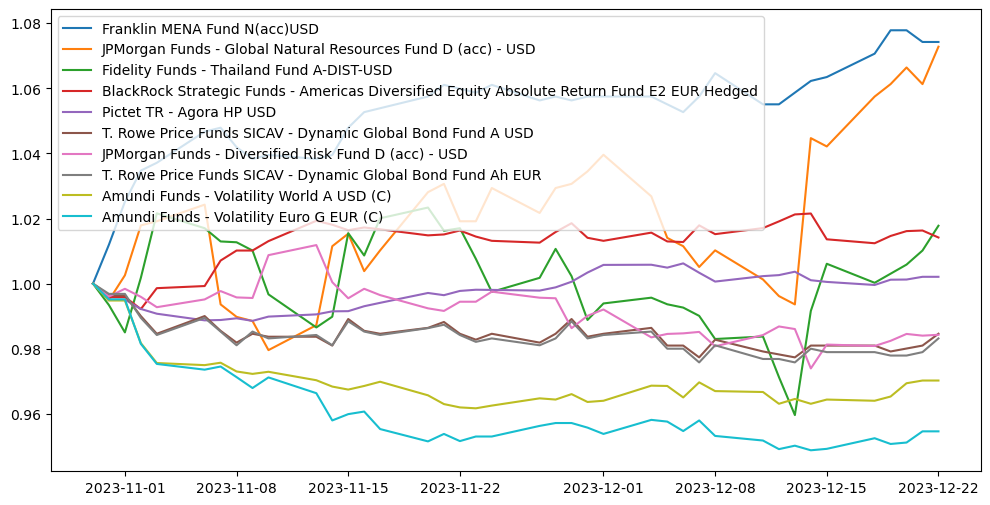

In [20]:

df_plot = df_quotes[pd.Index(trendy_funds_to_buy)][-40:]
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.plot()

In [17]:
df_perform.loc['LU1244139660']
df_quotes['LU1244139660']

2022-11-14    16.97
2022-11-15    17.82
2022-11-16    17.36
2022-11-17    16.73
2022-11-18    16.75
              ...  
2023-12-18    25.12
2023-12-19    25.28
2023-12-20    25.22
2023-12-21    25.09
2023-12-22    25.22
Name: LU1244139660, Length: 187, dtype: float64

In [23]:
trendy_funds_to_buy = ['LU0266512630']
df = pd.DataFrame(
    [(df_perform.loc[fund]['name'],df_perform.loc[fund]['currency'],0,0,0) for fund in trendy_funds_to_buy],
    columns = df_portofolio.columns, index = trendy_funds_to_buy)
new_portfolio = pd.concat([df_portofolio, df])


### Find the best Balance between Max Sharpe Ratio and Min Volatility

0.1264647216764052 0.4967060715107459
Target Return: 0.1 = (0.1264647580550654, 0.03913310781521293, 2.337273044782521)
Target Return: 0.15555555555555556 = (0.15555547820251162, 0.03938524755163015, 3.060929807397436)
Target Return: 0.2111111111111111 = (0.21111040911202353, 0.040854856033022025, 4.310635900165151)
Target Return: 0.26666666666666666 = (0.26666561762055024, 0.0440508663765462, 5.25904792973368)
Target Return: 0.3222222222222222 = (0.3222224206768268, 0.04857890638013991, 5.912492521532956)
Target Return: 0.37777777777777777 = (0.37777755480264935, 0.05439385445115926, 6.301769901422089)
Target Return: 0.43333333333333335 = (0.4333328330426727, 0.061378641967693263, 6.489762892641642)

No more Funds found!
Target Return: 0.4888888888888888 = None

No more Funds found!
Target Return: 0.5444444444444444 = None

No more Funds found!
Target Return: 0.6 = None


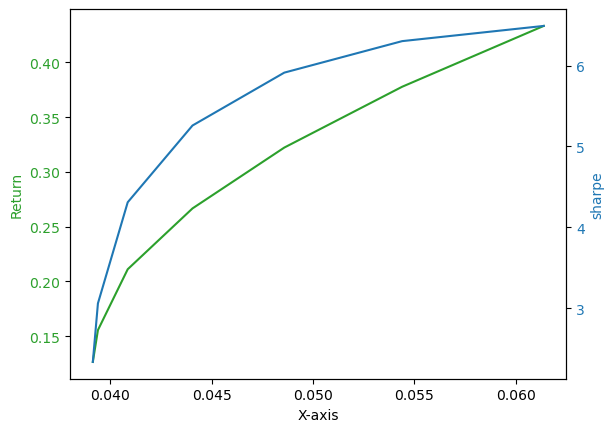

In [24]:
##### Select funds and weight bounds
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)].index.tolist()
weight_bounds = (0,1)

#####  Get the minimal volatility if you add funds to minimize it
_, (min_return,_,_) = new_funds_to_add(
    df_portofolio=new_portfolio,
    selected_funds=selected_funds, 
    n_funds_to_add=3, 
    last_n=last_n,
    goal='min_volatility',
    verbose=False,
    weight_bounds=weight_bounds)

#####  Get the maxim volatility if you add funds to maximize the Sharpe Ratio
_, (max_return,_,_) = new_funds_to_add(
    df_portofolio=new_portfolio,
    selected_funds=selected_funds, 
    n_funds_to_add=3, 
    last_n=last_n,
    goal='max_sharpe',
    verbose=False,
    weight_bounds=weight_bounds)

print(min_return, max_return)


In [ ]:

min_return, max_return = 0.1, .6
result = list()
for tr in np.linspace(min_return, max_return, 10):
    _, performance = new_funds_to_add(
        df_portofolio=new_portfolio,
        selected_funds=selected_funds, 
        n_funds_to_add=3, 
        last_n=last_n,
        goal='efficient_return',
        target=tr,
        verbose=False,
        weight_bounds=(0,0.1))
    if performance is not None:
        result.append(performance)
    print(f"Target Return: {tr} = {performance}")
df_result = pd.DataFrame(result,columns=['return','volatility','sharpe']).set_index('volatility')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first variable on the left y-axis
color = 'tab:green'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Return', color=color)
ax1.plot(df_result.index, df_result['return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
color = 'tab:blue'
ax2.set_ylabel('sharpe', color=color)
ax2.plot(df_result.index, df_result['sharpe'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.show()

In [33]:
target_volatility = 0.053

Expected annual return: 36.5%
Annual volatility: 5.3%
Sharpe Ratio: 6.22


,Code,w_i,name,w_o,change
26,LU0278528822,0.000000,0,0.08434,0.084340
27,LU0077500055,0.000000,0,0.06612,0.066120
28,LU0414665884,0.000000,0,0.06220,0.062200
23,LU1059379971,0.020899,JHH Pan Europ Property Equity,0.07461,0.053711
7,LU0173776047,0.048081,Nordea 1 - Swedish Bond,0.10000,0.051919
5,LU1495982271,0.050841,Black Strat Asia Pacif Abs E2,0.07126,0.020419
19,IE00B23S7K36,0.023144,BNY Mellon Brazil Equity,0.03045,0.007306
22,LU0941349275,0.021395,Pictet Global Opport,0.02738,0.005985
8,IE00BDRKSX26,0.046529,Man VI PLC GLC Innov Alt DN,0.04819,0.001661
21,LU0333810850,0.021634,GS India Equity,0.02149,-0.000144


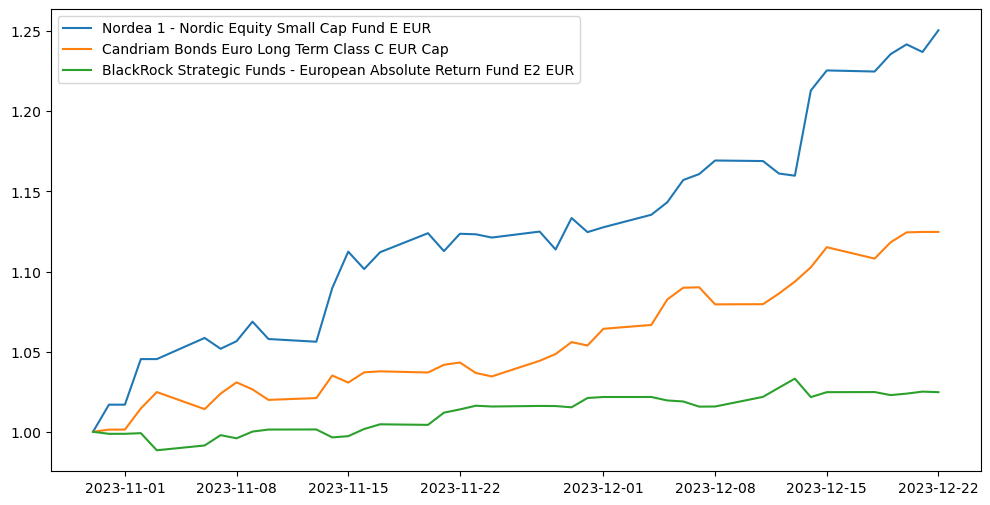

In [36]:

#####  Get the funds for the target volatility
funds_to_buy, performance = new_funds_to_add(
    df_portofolio=new_portfolio,
    selected_funds=selected_funds, 
    n_funds_to_add=3,
    last_n=last_n,
    goal='efficient_risk',
    target=target_volatility,
    verbose=False,
    weight_bounds=(0,0.1))

new_p = new_portfolio.index.append(pd.Index(funds_to_buy))

mu = mean_historical_return(df_quotes[new_p][-last_n:])
S = CovarianceShrinkage(df_quotes[new_p][-cov_n:]).ledoit_wolf()
weight_bounds = (0,0.1)
ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
weights = ef.efficient_risk(target_volatility=target_volatility)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
dfo = pd.DataFrame(cleaned_weights,columns=['Code','w']).sort_values(by='w',ascending=False)
df = pd.merge(dfi,dfo,on=['Code'],how='outer',suffixes=('_i','_o')).fillna(0)
df['change'] = df['w_o'] - df['w_i']

df.sort_values('change',ascending=False).to_csv('portfolio_changes.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df_plot = df_quotes[pd.Index(funds_to_buy)][-40:]
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.plot()
df.sort_values('change',ascending=False)


### Best Portofolio from all the funds

In [27]:
### Inputs
# Funds to use
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()
df_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)

mu = mean_historical_return(df_selected_quotes[-last_n:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_selected_quotes[-last_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
#weights = ef.max_sharpe(risk_free_rate=risk_free_rate)
ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df_top = df_quotes[df[:20]['symbol']].sort_index(axis=1)

mu = mean_historical_return(df_top[-last_n:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_top[-last_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
#weights = ef.max_sharpe(risk_free_rate=risk_free_rate)
ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df['name'] = df['symbol'].map(df_perform['name'])
best_from_all = df['symbol']
print(df)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)


          symbol        w                                               name
8   LU0414665884  0.10000  BlackRock Strategic Funds - European Absolute ...
3   IE00BLP5S460  0.10000  JupiterMerian Global Equity Absolute Return Fu...
18  LU1915690918  0.08378  Nordea 1 - European Covered Bond Opportunities...
19  LU1923623000  0.07428  Natixis International Funds (Lux) I - Thematic...
1   IE00B6116G19  0.06710  Man Funds VI plc-Man GLG Alpha Select Alternat...
4   LU0077500055  0.06482      Candriam Bonds Euro Long Term Class C EUR Cap
10  LU0705071453  0.06425  RAM (Lux) Systematic Funds - Long/Short Europe...
2   IE00BDRKSX26  0.05247  Man Funds VI PLC - Man GLG Innovation Equity A...
9   LU0424370004  0.05035            Man AHL Trend Alternative DNY H EUR Acc
17  LU1725895616  0.05024  Aberdeen Standard SICAV I - Frontier Markets B...
7   LU0278528822  0.04513      Nordea 1 - Nordic Equity Small Cap Fund E EUR
0   IE00B5ZNKR51  0.04250  Man Funds VI plc-Man GLG Alpha Select Alternat...

(0.25000500608379833, 0.023268831799766337, 9.240042986857526)

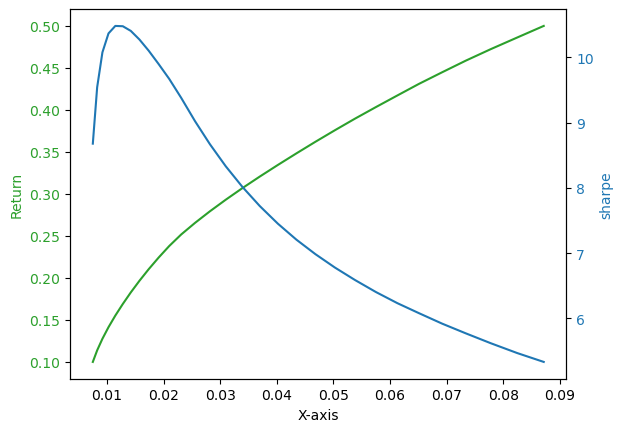

In [28]:
# Funds to use
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()
df_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)

mu = mean_historical_return(df_selected_quotes[-last_n:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_selected_quotes[-last_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))

min_return, max_return = 0.1, .5

result = list()
for tr in np.linspace(min_return, max_return, 30):
    ef.efficient_return(target_return=tr)
    result.append(ef.portfolio_performance(risk_free_rate=risk_free_rate))
df_result = pd.DataFrame(result,columns=['return','volatility','sharpe']).set_index('volatility')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first variable on the left y-axis
color = 'tab:green'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Return', color=color)
ax1.plot(df_result.index, df_result['return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
color = 'tab:blue'
ax2.set_ylabel('sharpe', color=color)
ax2.plot(df_result.index, df_result['sharpe'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.show()